This notebook is to try to make the synthetic simulations more 'realistic' by inputing the inversions of CS_AK_2p.

In [1]:
import numpy as np
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from mpl_toolkits.basemap import Basemap
import os
import warnings

In [2]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    # m.shadedrelief(scale=scale)
    m.drawlsmask(land_color='gray',ocean_color='white',lakes=True)
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

lon_g = np.load('will_lons.npy')[1:, 1:]
lat_g = np.load('will_lats.npy')[1:, 1:]

In [3]:
grid_x = np.load("WG_x.npy")
grid_y = np.load("WG_y.npy")

snow = np.loadtxt('synthetic/dailyFB_50km_2019-2020_season.pkl_snow_masked')
ice = np.loadtxt('synthetic/dailyFB_50km_2019-2020_season.pkl_ice_masked')

ak_observations = []
cs_observations = []

for i in range(160):
        for j in range(160):
            if not np.isnan(snow[i][j]):
                cs_observations.append([grid_x[i][j]/1000000, grid_y[i][j]/1000000, 0, snow[i][j], 0.01])                    
            if not np.isnan(ice[i][j]):
                ak_observations.append([grid_x[i][j]/1000000, grid_y[i][j]/1000000, 1, ice[i][j], 0.01])


cs_observations.extend(ak_observations)
data = pd.DataFrame(cs_observations, columns=["Longitude", "Latitude", "Type", "Value", "StdDev"])
print(cs_observations)
observations_matrix_subset = data.values

np.savetxt("observations.txt", observations_matrix_subset, '%5.1f %5.1f %d %5.5f %5.5f')

    # Add the total number of observations at the top of the file
with open('observations.txt', 'r') as original: data = original.read()
with open('observations.txt', 'w') as modified: modified.write(f"{observations_matrix_subset.shape[0]}\n" + data)

[[5.1, 0.45, 0, 0.184289, 0.01], [5.05, 1.05, 0, 0.153201, 0.01], [5.1, 1.05, 0, 0.153214, 0.01], [1.8, 1.15, 0, 0.096295, 0.01], [1.9, 1.15, 0, 0.100681, 0.01], [1.95, 1.15, 0, 0.103012, 0.01], [2.0, 1.15, 0, 0.105417, 0.01], [2.15, 1.15, 0, 0.113037, 0.01], [2.2, 1.15, 0, 0.1157, 0.01], [2.25, 1.15, 0, 0.11842, 0.01], [2.35, 1.15, 0, 0.124014, 0.01], [1.5, 1.2, 0, 0.092225, 0.01], [1.7, 1.2, 0, 0.090519, 0.01], [1.75, 1.2, 0, 0.092472, 0.01], [1.8, 1.2, 0, 0.094544, 0.01], [1.9, 1.2, 0, 0.098976, 0.01], [1.95, 1.2, 0, 0.101318, 0.01], [2.0, 1.2, 0, 0.10374, 0.01], [2.05, 1.2, 0, 0.106239, 0.01], [2.1, 1.2, 0, 0.108812, 0.01], [2.15, 1.2, 0, 0.111456, 0.01], [2.2, 1.2, 0, 0.114166, 0.01], [2.25, 1.2, 0, 0.116939, 0.01], [2.3, 1.2, 0, 0.119772, 0.01], [2.35, 1.2, 0, 0.122662, 0.01], [2.4, 1.2, 0, 0.125603, 0.01], [2.45, 1.2, 0, 0.128575, 0.01], [4.8, 1.2, 0, 0.144577, 0.01], [0.0, 1.25, 0, 0.060216, 0.01], [1.55, 1.25, 0, 0.083689, 0.01], [2.0, 1.25, 0, 0.102166, 0.01], [2.05, 1.25, 0,

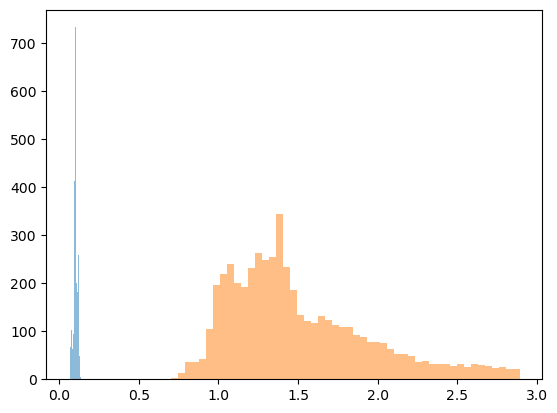

In [82]:
cs_ak_bris_output = np.loadtxt("observations.txt", skiprows=1)
plt.hist(np.asarray(cs_ak_bris_output)[:5059, 3].ravel(), alpha = 0.5, bins=50)
plt.hist(np.asarray(cs_ak_bris_output)[5059:, 3].ravel(), alpha = 0.5, bins = 50)
plt.show()

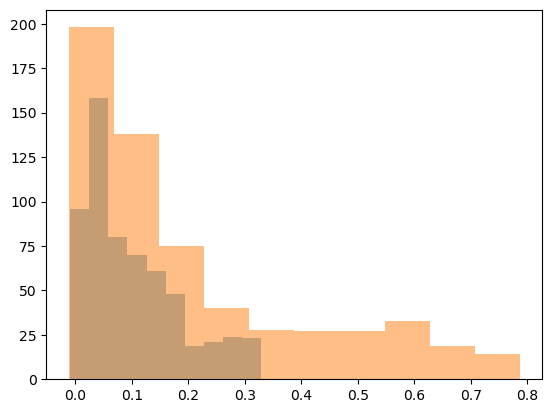

In [13]:
obs = pd.read_table("synthetic/synthetic_obs.txt", skiprows=1, delimiter="\s+")
plt.hist(np.asarray(obs)[:600,3]. ravel(), alpha = 0.5)
plt.hist(np.asarray(obs)[600:,3]. ravel(), alpha = 0.5)
plt.show()

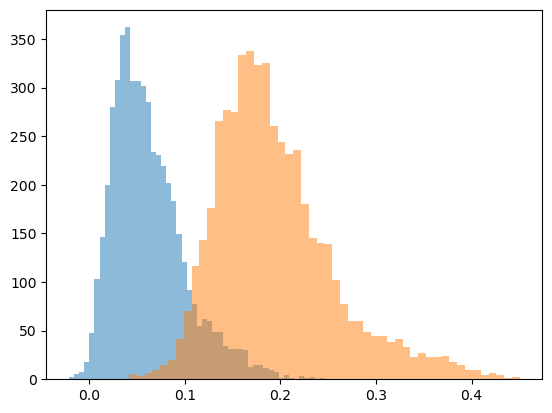

In [7]:
cs_ak_2p_obs = pd.read_table("/home/sraz/coding/MSCI_2021_Project3/snow_ice/CS_AK_2p_bristol/observations.txt", skiprows=1, delimiter = "\s+")
plt.hist(np.asarray(cs_ak_2p_obs)[:5059, 3].ravel(), alpha = 0.5, bins = 50)
plt.hist(np.asarray(cs_ak_2p_obs)[5059:, 3].ravel(), alpha = 0.5, bins =50)
plt.show()

In [4]:
# y coordinates
minlat = -0.1
maxlat = 7950000.0/1000000

# x coordinates
minlon = -0.1
maxlon = 7950000.0/1000000

parametrization = 2
iterations_number = 250000
verbosity = 5000
independent_chains = 4
temperature_levels = 1
maximum_temperature = 5.0
iterations_between_tempering_attempts = 10

In [5]:
A = "SyntheticSnow"
B = "SyntheticIce"

# Create the observations file
subprocess.run([
    "./mksynthetic", 
    "-m", str(A), # Model for snow
    "-m", str(B), # Model for ice
    "-i", "observations.txt",    # input points from real data
    "-x", str(minlon), "-X", str(maxlon),  # same region bounds as before
    "-y", str(minlat), "-Y", str(maxlat),
    "-o", "synthetic/synthetic_obs.txt",     # Observations with noise
    "-O", "synthetic/synthetic_true.txt",    # Observations without noise, the 'actual' data
    "-n", str(0.1),                           # Standard deviation of independent Gaussian noise to be added to both snow and ice
    "-I", "synthetic/syntheticobs_true.img",  # translated image of the actual data
    "-W", str(160), "-H", str(160)            # width and height of the image
])

Model  0 : SyntheticSnow
Model  1 : SyntheticIce
10118 observations


CompletedProcess(args=['./mksynthetic', '-m', 'SyntheticSnow', '-m', 'SyntheticIce', '-i', 'observations.txt', '-x', '-0.1', '-X', '7.95', '-y', '-0.1', '-Y', '7.95', '-o', 'synthetic/synthetic_obs.txt', '-O', 'synthetic/synthetic_true.txt', '-n', '0.1', '-I', 'synthetic/syntheticobs_true.img', '-W', '160', '-H', '160'], returncode=0)

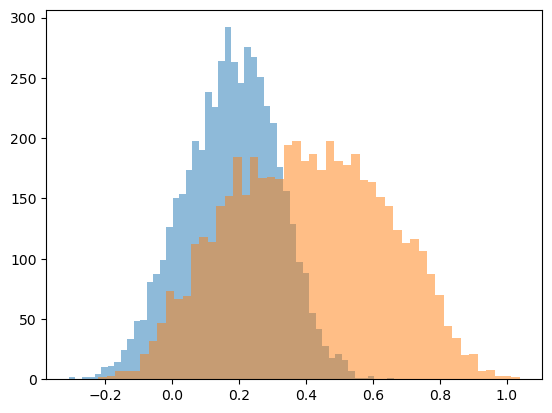

In [6]:
obs = pd.read_table("synthetic/synthetic_obs.txt", skiprows=1, delimiter="\s+")
plt.hist(np.asarray(obs)[:5060,3]. ravel(), alpha = 0.5, bins =50)
plt.hist(np.asarray(obs)[5060:,3]. ravel(), alpha = 0.5, bins=50)
plt.show()

In [7]:
# masking the image
def mask_image(observations, data):
    mask_data = np.copy(data)
    for i in range(len(observations)):
        for j in range(len(observations[0])):
            if np.isnan(observations[i][j]):
                mask_data[i][j] = np.nan
    return mask_data

mask = np.loadtxt('synthetic/dailyFB_50km_2019-2020_season.pkl_ice_masked')
real_snow = np.loadtxt("synthetic/syntheticobs_true.img.A")
real_ice = np.loadtxt("synthetic/syntheticobs_true.img.B")
masked_snow_image = mask_image(mask, real_snow)
masked_ice_image = mask_image(mask, real_ice)

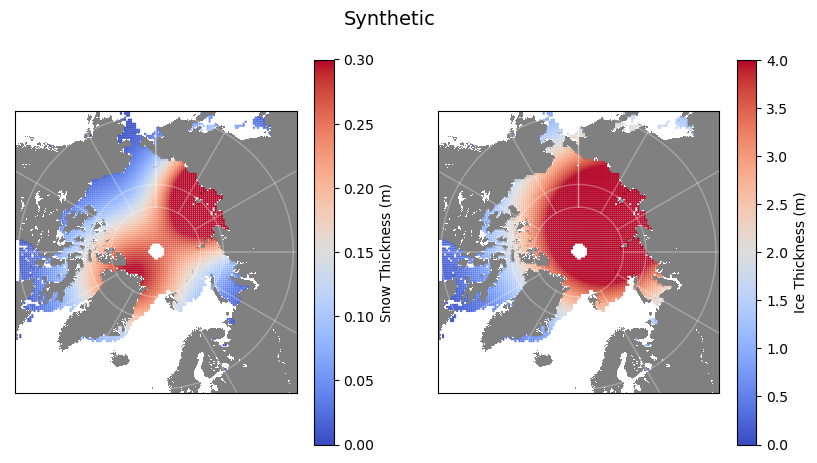

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)

fig.suptitle("Synthetic", fontsize=14)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=masked_snow_image, cmap="coolwarm", vmin=0, vmax=0.3)
plt.colorbar(label=r'Snow Thickness (m)')

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=masked_ice_image, cmap="coolwarm", vmin=0, vmax=4)
plt.colorbar(label=r'Ice Thickness (m)')

plt.show()

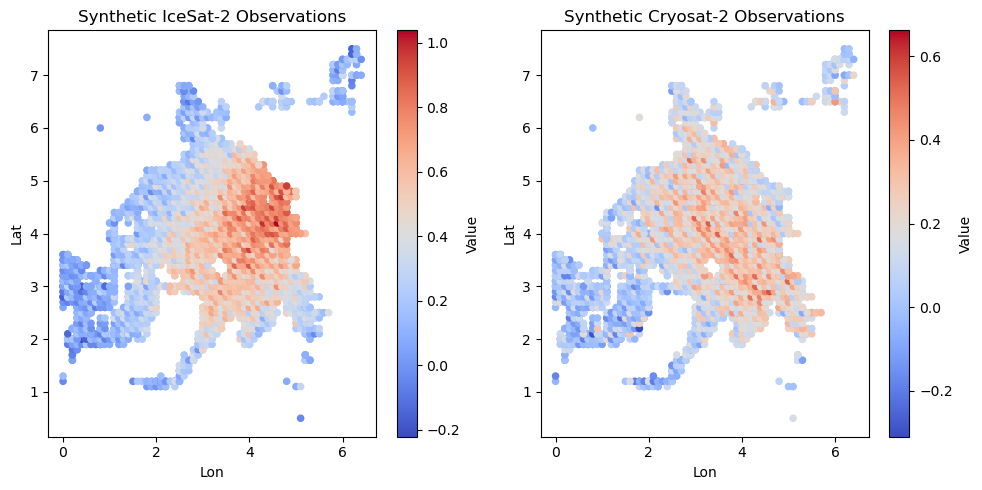

In [9]:
obs = pd.read_table("synthetic/synthetic_obs.txt", skiprows=1, names=["Lon", "Lat", "Type", "Value", "Sigma"], delimiter="\s+")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

obs[obs['Type']==1].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[0], title='Synthetic IceSat-2 Observations', cmap='coolwarm')
obs[obs['Type']==0].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[1], title='Synthetic Cryosat-2 Observations', cmap='coolwarm')

plt.tight_layout()
plt.show()

In [10]:
# Run inversion
subprocess.run([
                "mpirun", "-np", str(independent_chains * temperature_levels),
                "./snow_icept", 
                "-i", "synthetic/synthetic_obs.txt", 
                "-o", "results/", 
                "-P", "priors/synthetic/prior_snow.txt",
                "-P", "priors/synthetic/prior_ice.txt", 
                "-M", "priors/synthetic/positionprior_snow.txt", 
                "-M", "priors/synthetic/positionprior_ice.txt",
                "-H", "priors/synthetic/hierarchical_snow.txt", 
                "-H", "priors/synthetic/hierarchical_ice.txt", 
                "-x", str(minlon), "-X", str(maxlon),
                "-y", str(minlat), "-Y", str(maxlat),
                "-A", str(parametrization), "-A", str(parametrization),
                "-t", str(iterations_number), 
                "-v", str(verbosity),
                "-c", str(independent_chains),    # Independent chains to run at each temperature
                "-K", str(temperature_levels),    # Number of temperature levels for parallel tempering
                "-m", str(maximum_temperature),  # Maximum temperature for the parallel tempering log temperature
                "-e", str(iterations_between_tempering_attempts)    # Number of iterations between parallel tempering exchange attempts
                ])

CompletedProcess(args=['mpirun', '-np', '4', './snow_icept', '-i', 'synthetic/synthetic_obs.txt', '-o', 'results/', '-P', 'priors/synthetic/prior_snow.txt', '-P', 'priors/synthetic/prior_ice.txt', '-M', 'priors/synthetic/positionprior_snow.txt', '-M', 'priors/synthetic/positionprior_ice.txt', '-H', 'priors/synthetic/hierarchical_snow.txt', '-H', 'priors/synthetic/hierarchical_ice.txt', '-x', '-0.1', '-X', '7.95', '-y', '-0.1', '-Y', '7.95', '-A', '2', '-A', '2', '-t', '250000', '-v', '5000', '-c', '4', '-K', '1', '-m', '5.0', '-e', '10'], returncode=0)

In [11]:
parameter_W = 160
parameter_H = 160
skipping = 50000
thinning = 5

file_snow = f"images/snow"
file_ice = f"images/ice"


subprocess.run([
            "mpirun", "-np", str(independent_chains),
            "./post_mean_mpi", "-i", 
            "results/ch.dat", "-o", file_snow,
            "-x", str(minlon), "-X", str(maxlon),
            "-y", str(minlat), "-Y", str(maxlat),
            "-s", str(skipping),
            "-t", str(thinning),
            "-A", str(parametrization), "-A", str(parametrization),
            "-W", str(parameter_W), "-H", str(parameter_H),
            "-D", str(file_snow + "_stddev"),
            "-m", str(file_snow + "_median"),
            "-I", str(0)])

CompletedProcess(args=['mpirun', '-np', '4', './post_mean_mpi', '-i', 'results/ch.dat', '-o', 'images/snow', '-x', '-0.1', '-X', '7.95', '-y', '-0.1', '-Y', '7.95', '-s', '50000', '-t', '5', '-A', '2', '-A', '2', '-W', '160', '-H', '160', '-D', 'images/snow_stddev', '-m', 'images/snow_median', '-I', '0'], returncode=0)

In [12]:
subprocess.run([
            "mpirun", "-np", str(independent_chains),
            "./post_mean_mpi", "-i", 
            "results/ch.dat", "-o", file_ice,
            "-x", str(minlon), "-X", str(maxlon),
            "-y", str(minlat), "-Y", str(maxlat),
            "-s", str(skipping),
            "-t", str(thinning),
            "-A", str(parametrization), "-A", str(parametrization),
            "-W", str(parameter_W), "-H", str(parameter_H),
            "-D", str(file_ice + "_stddev"),
            "-m", str(file_ice + "_median"),
            "-I", str(1)])

CompletedProcess(args=['mpirun', '-np', '4', './post_mean_mpi', '-i', 'results/ch.dat', '-o', 'images/ice', '-x', '-0.1', '-X', '7.95', '-y', '-0.1', '-Y', '7.95', '-s', '50000', '-t', '5', '-A', '2', '-A', '2', '-W', '160', '-H', '160', '-D', 'images/ice_stddev', '-m', 'images/ice_median', '-I', '1'], returncode=0)

In [13]:
def mask_observations(observations, inversion):
    new_inversion = np.copy(inversion)
    for i in range(len(observations)):
        for j in range(len(observations[0])):
            if np.isnan(observations[i][j]):
                new_inversion[i][j] = np.nan
    return new_inversion

snow = np.loadtxt('synthetic/dailyFB_50km_2019-2020_season.pkl_snow_masked')
ice = np.loadtxt('synthetic/dailyFB_50km_2019-2020_season.pkl_ice_masked')
inverse_snow = np.loadtxt('images/snow')
inverse_ice = np.loadtxt('images/ice')
mask_snow = mask_observations(snow, inverse_snow)
mask_ice = mask_observations(ice, inverse_ice)

In [14]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    # m.shadedrelief(scale=scale)
    m.drawlsmask(land_color='gray',ocean_color='white',lakes=True)
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

lon_g = np.load('will_lons.npy')[1:, 1:]
lat_g = np.load('will_lats.npy')[1:, 1:]


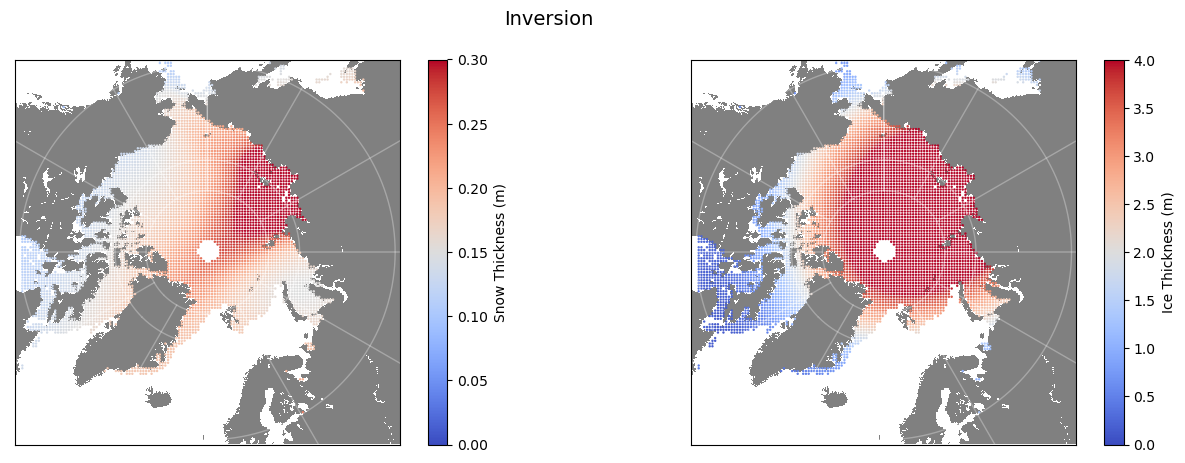

In [20]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

fig.suptitle("Inversion", fontsize=14)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=mask_snow, cmap="coolwarm", vmin=0, vmax=0.3)
plt.colorbar(label=r'Snow Thickness (m)')

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=mask_ice, cmap="coolwarm", vmin=0, vmax=4)
plt.colorbar(label=r'Ice Thickness (m)')

plt.show()

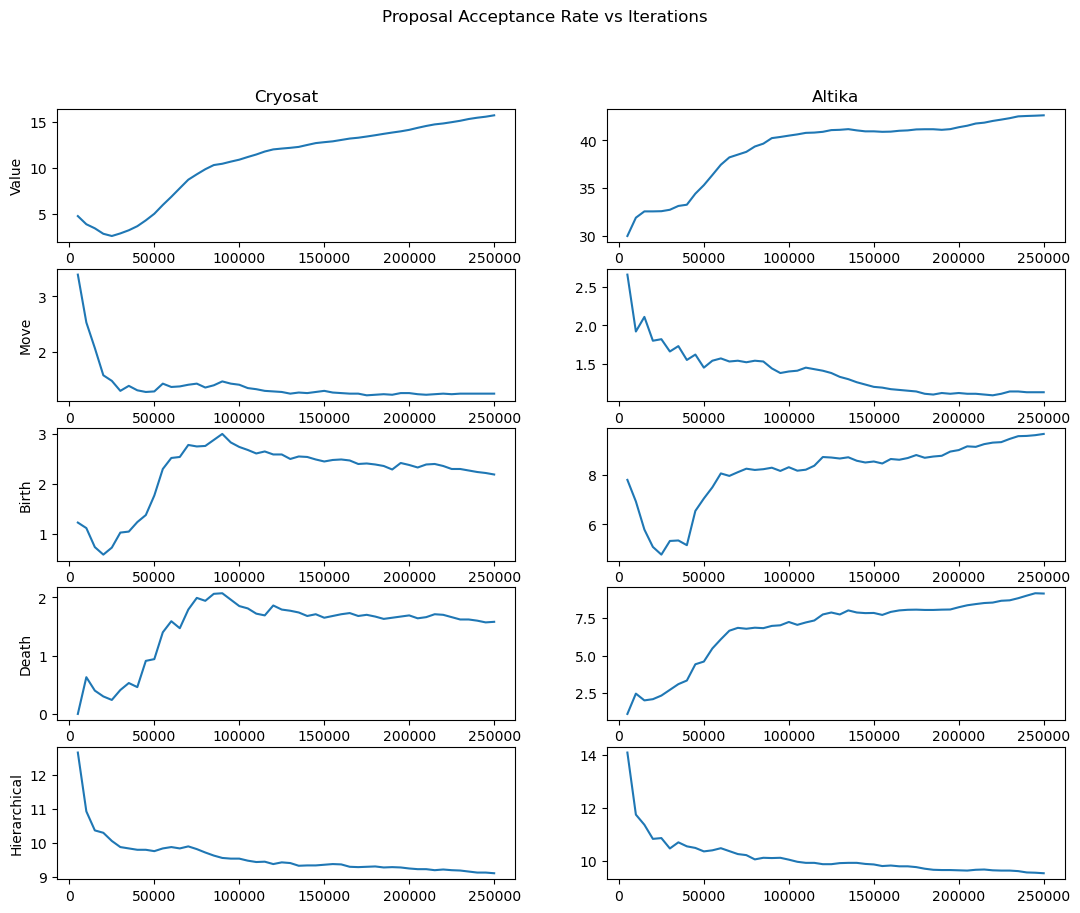

In [17]:
file = 'results/log.txt-000'

iterations = np.arange(5000,250001,5000)

keywords = ["Value", "Move", "Birth", "Death", "Hierarchical"]

rate = {key: {"snow": [], "ice": []} for key in keywords}

with open(file) as f:
    for line in f:
        data = line.split()

        for key in keywords:
            if key in line:
                rate[key]["snow"].append(float(data[4]))
                rate[key]["ice"].append(float(data[9]))
            

plt.figure(figsize=(13,10))
plt.suptitle('Proposal Acceptance Rate vs Iterations')

plt.subplot(5,2,1)
plt.plot(iterations, rate["Value"]["snow"], '-')
plt.ylabel("Value")
plt.title('Cryosat')

plt.subplot(5,2,2)
plt.plot(iterations, rate["Value"]["ice"],'-')
plt.title('Altika')

plt.subplot(5,2,3)
plt.plot(iterations, rate["Move"]['snow'],'-')
plt.ylabel("Move")

plt.subplot(5,2,4)
plt.plot(iterations, rate["Move"]['ice'],'-')

plt.subplot(5,2,5)
plt.plot(iterations, rate["Birth"]['snow'],'-')
plt.ylabel("Birth")
plt.subplot(5,2,6)
plt.plot(iterations, rate["Birth"]['ice'],'-')

plt.subplot(5,2,7)
plt.plot(iterations, rate["Death"]['snow'],'-')
plt.ylabel("Death")
plt.subplot(5,2,8)
plt.plot(iterations, rate["Death"]['ice'],'-')

plt.subplot(5,2,9)
plt.plot(iterations, rate["Hierarchical"]['snow'],'-')
plt.ylabel("Hierarchical")
plt.subplot(5,2,10)
plt.plot(iterations, rate["Hierarchical"]['ice'],'-')

plt.show()

In [28]:
# y coordinates
minlat = 0
maxlat = 7950000.0/1000000

# x coordinates
minlon = 0
maxlon = 7950000.0/1000000

subprocess.run([
        "python", "../../scripts/generatetemplatepoints.py",
        "-N", str(600),  # create 600 observation points for 'A' 
        "-o", "synthetic/datatest.txt",  # creates output directory for the synthetic points
        "--xmin", str(minlon), "--xmax", str(maxlon),
        "--ymin", str(minlat), "--ymax", str(maxlat)
 ])

CompletedProcess(args=['python', '../../scripts/generatetemplatepoints.py', '-N', '600', '-o', 'synthetic/datatest.txt', '--xmin', '0', '--xmax', '7.95', '--ymin', '0', '--ymax', '7.95'], returncode=0)

In [29]:
A = "SyntheticSnow"
B = "SyntheticIce"

# Create the observations file
subprocess.run([
    "./mksynthetic", 
    "-m", str(A), # Model for snow
    "-i", "synthetic/datasnow.txt",    # input points from real data
    "-x", str(minlon), "-X", str(maxlon),  # same region bounds as before
    "-y", str(minlat), "-Y", str(maxlat),
    "-o", "synthetic/snow_obs.txt",     # Observations with noise
    "-O", "synthetic/snow_true.txt",    # Observations without noise, the 'actual' data
    "-n", str(0.1),                           # Standard deviation of independent Gaussian noise to be added to both snow and ice
    "-I", "synthetic/snow_true.img",  # translated image of the actual data
    "-W", str(160), "-H", str(160)            # width and height of the image
])

Model  0 : SyntheticSnow
Model  1 : Constant
600 observations


error: y coord out of range:  -0.085725 (  0.000000 ..   7.950000)


CompletedProcess(args=['./mksynthetic', '-m', 'SyntheticSnow', '-i', 'synthetic/datasnow.txt', '-x', '0', '-X', '7.95', '-y', '0', '-Y', '7.95', '-o', 'synthetic/snow_obs.txt', '-O', 'synthetic/snow_true.txt', '-n', '0.1', '-I', 'synthetic/snow_true.img', '-W', '160', '-H', '160'], returncode=255)

In [30]:
subprocess.run([
    "./mksynthetic", 
    "-m", str(B), # Model for snow
    "-i", "synthetic/datasnow.txt",    # input points from real data
    "-x", str(minlon), "-X", str(maxlon),  # same region bounds as before
    "-y", str(minlat), "-Y", str(maxlat),
    "-o", "synthetic/ice_obs.txt",     # Observations with noise
    "-O", "synthetic/ice_true.txt",    # Observations without noise, the 'actual' data
    "-n", str(1),                           # Standard deviation of independent Gaussian noise to be added to both snow and ice
    "-I", "synthetic/ice_true.img",  # translated image of the actual data
    "-W", str(160), "-H", str(160)            # width and height of the image
])

Model  0 : SyntheticIce
Model  1 : Constant
600 observations


error: y coord out of range:  -0.085725 (  0.000000 ..   7.950000)


CompletedProcess(args=['./mksynthetic', '-m', 'SyntheticIce', '-i', 'synthetic/datasnow.txt', '-x', '0', '-X', '7.95', '-y', '0', '-Y', '7.95', '-o', 'synthetic/ice_obs.txt', '-O', 'synthetic/ice_true.txt', '-n', '1', '-I', 'synthetic/ice_true.img', '-W', '160', '-H', '160'], returncode=255)

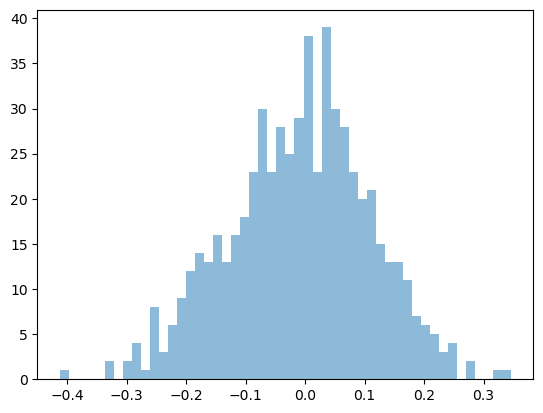

In [32]:
snow = pd.read_table("synthetic/snow_obs.txt", skiprows=1, delimiter="\s+")
# ice = pd.read_table("synthetic/ice_obs.txt", skiprows = 1, delimiter='\s+')
plt.hist(np.asarray(snow)[:,3]. ravel(), alpha = 0.5, bins =50)
# plt.hist(np.asarray(ice)[:,3]. ravel(), alpha = 0.5, bins=50)
plt.show()

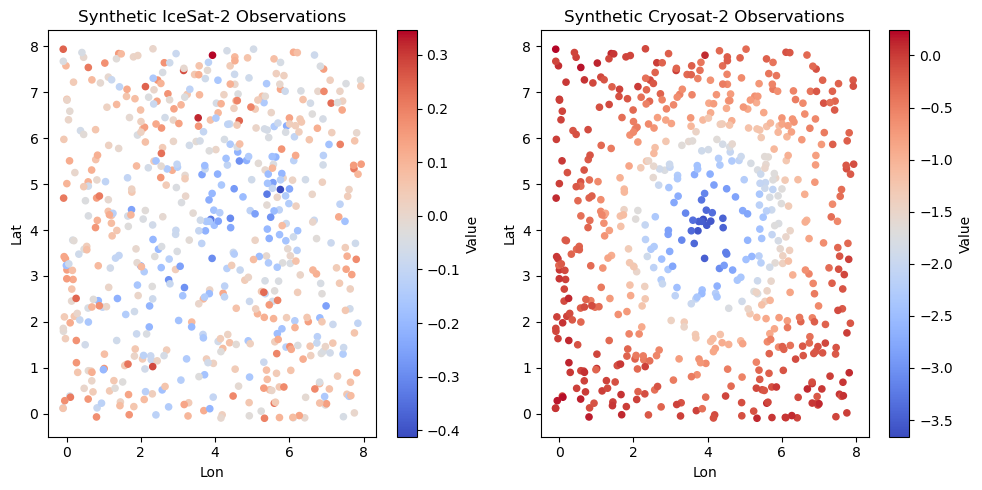

In [25]:
a = pd.read_table("synthetic/snow_obs.txt", skiprows=1, names=['Lon','Lat','Type','Value','Sigma'], delimiter='\s+')
b = pd.read_table("synthetic/ice_obs.txt", skiprows=1, names=['Lon','Lat','Type','Value','Sigma'], delimiter='\s+')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

a.plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[0], title='Synthetic IceSat-2 Observations', cmap='coolwarm')
b.plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[1], title='Synthetic Cryosat-2 Observations', cmap='coolwarm')

plt.tight_layout()
plt.show()

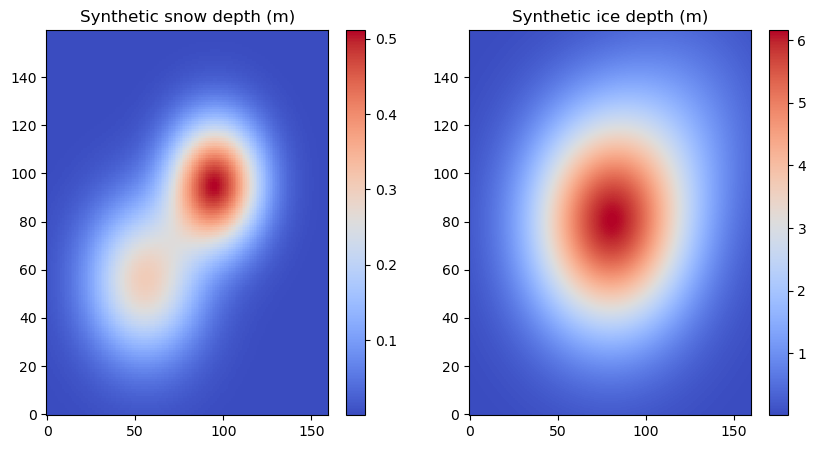

In [17]:
a = np.loadtxt("synthetic/snow_true.img.A")
b = np.loadtxt("synthetic/ice_true.img.A")

fig, ax = plt.subplots(1,2,figsize=(10,5))

img = ax[0].imshow(a, cmap='coolwarm', aspect='auto', interpolation='None', origin='lower') 
ax[0].set_title('Synthetic snow depth (m)')
plt.colorbar(img, ax=ax[0])


img = ax[1].imshow(b, cmap='coolwarm', aspect='auto', origin='lower') 
ax[1].set_title('Synthetic ice depth (m)')
plt.colorbar(img, ax=ax[1])

In [64]:
A = "SyntheticSnow"
B = "SyntheticIce"

# Create the observations file
subprocess.run([
    "./mksynthetic", 
    "-m", str(A), # Model for snow
    "-m", str(B), # Model for ice
    "-i", "synthetic/observations.txt",    # input points from real data
    "-x", str(minlon), "-X", str(maxlon),  # same region bounds as before
    "-y", str(minlat), "-Y", str(maxlat),
    "-o", "synthetic/test_obs.txt",     # Observations with noise
    "-O", "synthetic/test_true.txt",    # Observations without noise, the 'actual' data
    "-n", str(0.07),                           # Standard deviation of independent Gaussian noise to be added to both snow and ice
    "-I", "synthetic/test_true.img",  # translated image of the actual data
    "-W", str(160), "-H", str(160)            # width and height of the image
])

Model  0 : SyntheticSnow
Model  1 : SyntheticIce
10118 observations


CompletedProcess(args=['./mksynthetic', '-m', 'SyntheticSnow', '-m', 'SyntheticIce', '-i', 'synthetic/observations.txt', '-x', '0', '-X', '7.95', '-y', '0', '-Y', '7.95', '-o', 'synthetic/test_obs.txt', '-O', 'synthetic/test_true.txt', '-n', '0.07', '-I', 'synthetic/test_true.img', '-W', '160', '-H', '160'], returncode=0)

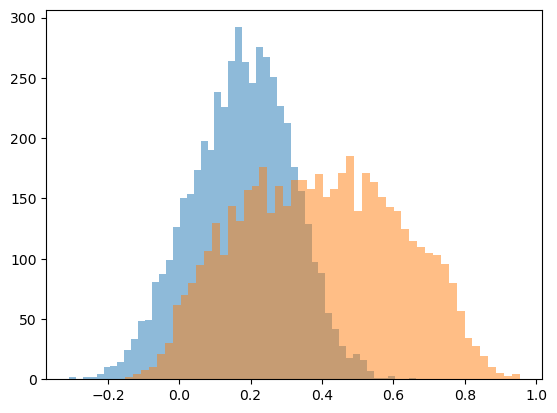

In [65]:
obs = pd.read_table("synthetic/synthetic_obs.txt", skiprows=1, delimiter="\s+")
test = pd.read_table("synthetic/test_obs.txt", skiprows=1, delimiter="\s+")
plt.hist(np.asarray(obs)[:5060,3]. ravel(), alpha = 0.5, bins =50)
plt.hist(np.asarray(test)[5060:,3]. ravel(), alpha = 0.5, bins=50)
plt.show()

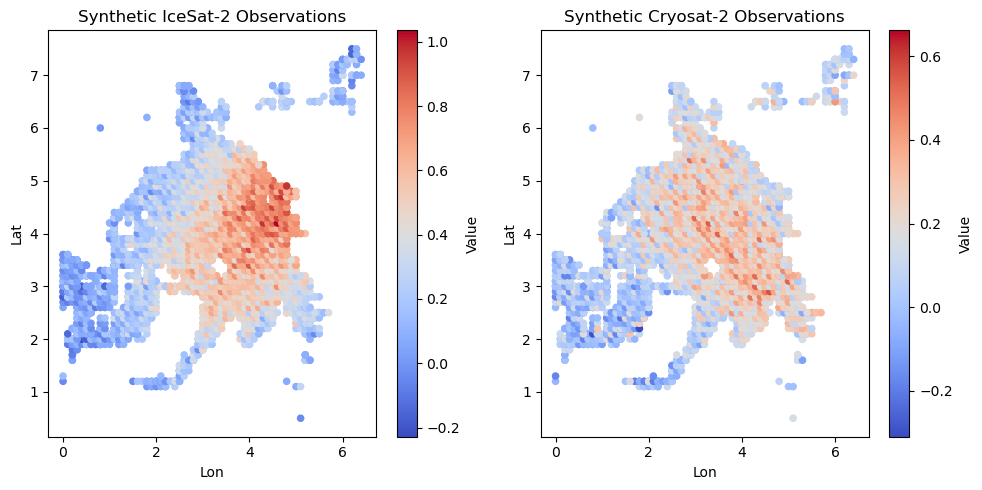

In [57]:
a = pd.read_table("synthetic/synthetic_obs.txt", skiprows=1, names=['Lon','Lat','Type','Value','Sigma'], delimiter='\s+')
b = pd.read_table("synthetic/test_obs.txt", skiprows=1, names=['Lon','Lat','Type','Value','Sigma'], delimiter='\s+')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

b[b['Type']==1].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[0], title='Synthetic IceSat-2 Observations', cmap='coolwarm')
a[a['Type']==0].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[1], title='Synthetic Cryosat-2 Observations', cmap='coolwarm')

plt.tight_layout()
plt.show()